## W207 Project - Predicting Effective Argument
### Team Members: Adam, Vivek & Waqas

In [46]:
import pandas as pd
import numpy as np
import random
import os
import nltk
nltk.download('popular')

# tf and keras
import tensorflow as tf
from keras import models
from keras import layers


# plots
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)
%matplotlib inline

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/adam/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

# Exploratory Data Analysis

In [124]:
# Loading training dataset's csv file into a dataframe
df = pd.read_csv('../data/raw/train.csv')
df.head(10)


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


In [126]:
#4191 Essays
len(df['essay_id'].unique())

4191

### Distribution of Labels across various Discourse Types

,Lead,Position,Claim,Evidence,Counterclaim,Rebuttal,Concluding Statement
Adequate,1244,2784,7097,6064,1150,693,1945
Effective,683,770,3405,2885,418,340,825
Ineffective,364,470,1475,3156,205,211,581


,discourse_type,Adequate,Effective,Ineffective
0,Lead,1244,683,364
1,Position,2784,770,470
2,Claim,7097,3405,1475
3,Evidence,6064,2885,3156
4,Counterclaim,1150,418,205
5,Rebuttal,693,340,211
6,Concluding Statement,1945,825,581


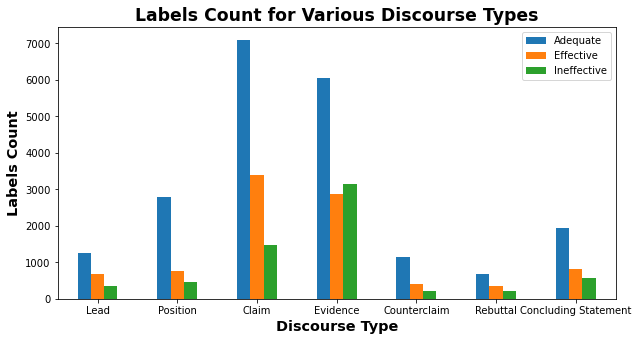

In [48]:
# Define another dataframe where rows are output class labels and columms are discourse types
discourse = ['Lead', 'Position', 'Claim', 'Evidence', 'Counterclaim', 'Rebuttal', 'Concluding Statement']
df1 = pd.DataFrame()
for x in discourse:
    df2 = df[df.discourse_type == x]
    df1[x] = pd.DataFrame(df2['discourse_effectiveness'].value_counts())
display(df1)

# Take transpose of the dataframe from previous section
df3 = df1.transpose()
df3.index.name = 'discourse_type'
df3 = df3.reset_index()
display(df3)

# build the bar plot
df3.plot.bar( x = 'discourse_type', figsize=(10,5), rot=0)
plt.xlabel('Discourse Type', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('Labels Count', fontweight = 'bold', fontsize = 'x-large')
plt.title('Labels Count for Various Discourse Types', fontweight = 'bold', fontsize = 'xx-large')
plt.show()

### Distribution of Discourse Types

{'Lead': 2291, 'Position': 4024, 'Claim': 11977, 'Evidence': 12105, 'Counterclaim': 1773, 'Rebuttal': 1244, 'Concluding Statement': 3351}


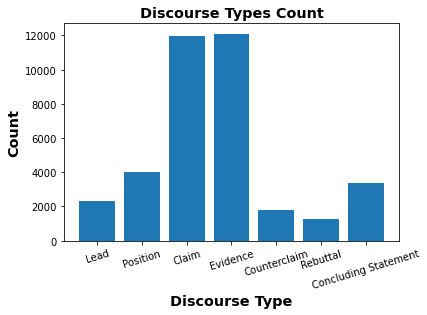

In [49]:
# Get total count of examples for various discourse types from df1 and save into a dictionary
discourse_total = {}
for x in discourse:
    discourse_total[x] = df1[x].sum()   
print(discourse_total)

# Plot the values from dictiorny into a bar plot
names = list(discourse_total.keys())
values = list(discourse_total.values())
plt.bar(range(len(discourse_total)), values, tick_label=names)
plt.xlabel('Discourse Type', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('Count', fontweight = 'bold', fontsize = 'x-large')
plt.title('Discourse Types Count', fontweight = 'bold', fontsize = 'x-large')
plt.xticks(rotation=17)
plt.show()

### Distribution of Output Labels

{'Adequate': 20977, 'Ineffective': 6462, 'Effective': 9326}


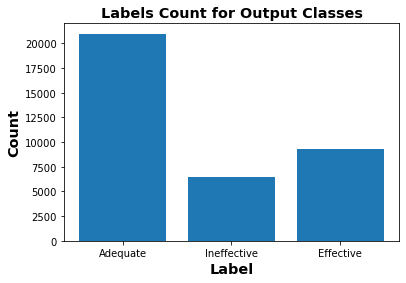

In [50]:
# Get total count of different output lables from df3 and save into a dictionary
lables = ['Adequate', 'Ineffective', 'Effective']
lables_total = {}
for x in lables:
    lables_total[x] = df3[x].sum()
print(lables_total)

# Plot the values from dictiorny into a bar plot
names = list(lables_total.keys())
values = list(lables_total.values())
plt.bar(range(len(lables_total)), values, tick_label=names)
plt.xlabel('Label', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('Count', fontweight = 'bold', fontsize = 'x-large')
plt.title('Labels Count for Output Classes', fontweight = 'bold', fontsize = 'x-large')
plt.show()

In [51]:
df.head()
df['comma_count'] = df['discourse_text'].apply(lambda x: x.count(','))
df.head()



,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,comma_count
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,3
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,2
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,5
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0


In [52]:
from spellchecker import SpellChecker

spell = SpellChecker()
sentence_example="""Firstly, secondly, thirdly etc
Next, last, finally
In addition
Furthermore
Also
At prexsent / presenftly"""
tokens = nltk.word_tokenize(sentence_example)
misspelled = spell.unknown(tokens)
len(misspelled)
text = nltk.Text(tokens)
tags = nltk.pos_tag(text)
correctedInput =  [' '.join([spell.correction(w).lower() for w in tokens])]    
print(correctedInput)
print(tags)

['firstly , secondly , thirdly etc next , last , finally in addition furthermore also at present / presently']
[('Firstly', 'RB'), (',', ','), ('secondly', 'RB'), (',', ','), ('thirdly', 'RB'), ('etc', 'JJ'), ('Next', 'NNP'), (',', ','), ('last', 'JJ'), (',', ','), ('finally', 'RB'), ('In', 'IN'), ('addition', 'NN'), ('Furthermore', 'NNP'), ('Also', 'RB'), ('At', 'IN'), ('prexsent', 'JJ'), ('/', 'CD'), ('presenftly', 'RB')]


In [53]:
""" 
Using Penn Treebank Tagger
https://www.nltk.org/api/nltk.tag.html

"""
part_of_speech_dict = {'CC' : 'Coordinating conjunction',
 'CD' : 'Cardinal number',
 'DT' : 'Determiner',
 'EX' : 'Existential there',
 'FW' : 'Foreign word',
 'IN' : 'Preposition or subordinating conjunction',
 'JJ' : 'Adjective',
 'JJR' : 'Adjective, comparative',
 'JJS' : 'Adjective, superlative',
 'LS' : 'List item marker',
 'MD' : 'Modal',
 'NN' : 'Noun, singular or mass',
 'NNS' : 'Noun, plural',
 'NNP' : 'Proper noun, singular',
 'NNPS' : 'Proper noun, plural',
 'PDT' : 'Predeterminer',
 'POS' : 'Possessive ending',
 'PRP' : 'Personal pronoun',
 'PRP$' : 'Possessive pronoun',
 'RB' : 'Adverb',
 'RBR' : 'Adverb, comparative',
 'RBS' : 'Adverb, superlative',
 'RP' : 'Particle',
 'SYM' : 'Symbol',
 'TO' : 'to',
 'UH' : 'Interjection',
 'VB' : 'Verb, base form',
 'VBD' : 'Verb, past tense',
 'VBG' : 'Verb, gerund or present participle',
 'VBN' : 'Verb, past participle',
 'VBP' : 'Verb, non-3rd person singular present',
 'VBZ' : 'Verb, 3rd person singular present',
 'WDT' : 'Wh-determiner',
 'WP' : 'Wh-pronoun',
 'WP$' : 'Possessive wh-pronoun',
 'WRB' : 'Wh-adverb' }

In [54]:
"""from collections import Counter
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokens = nltk.word_tokenize("The fox houses are always cleaner than dog houses.")
text = nltk.Text(tokens)
tags = nltk.pos_tag(text)
print(tags)
nouns_singular = [stemmer.stem(item[0]) for item in tags if item[1].startswith('N')]
print(nouns_singular)
tokens = nltk.word_tokenize("The quick brown fox jumped over the lazy dog house.")
text = nltk.Text(tokens)
tags = nltk.pos_tag(text)
print(tags)
nouns_singular2 = [stemmer.stem(item[0]) for item in tags if item[1].startswith('N')]
print(nouns_singular2)
print(len(set(nouns_singular) & set(nouns_singular2)))
counts = Counter(tag for word,tag in tags)
total = sum(counts.values())
proportional_counts = dict((word, round(float(count)/total, 3)) for word,count in counts.items())
print(proportional_counts)
df0 = pd.DataFrame([{'discourse_text': "The quick brown fox jumped over the lazy dog house."}]) #starter frame
"""

'from collections import Counter\nfrom nltk.stem.porter import *\n\nstemmer = PorterStemmer()\ntokens = nltk.word_tokenize("The fox houses are always cleaner than dog houses.")\ntext = nltk.Text(tokens)\ntags = nltk.pos_tag(text)\nprint(tags)\nnouns_singular = [stemmer.stem(item[0]) for item in tags if item[1].startswith(\'N\')]\nprint(nouns_singular)\ntokens = nltk.word_tokenize("The quick brown fox jumped over the lazy dog house.")\ntext = nltk.Text(tokens)\ntags = nltk.pos_tag(text)\nprint(tags)\nnouns_singular2 = [stemmer.stem(item[0]) for item in tags if item[1].startswith(\'N\')]\nprint(nouns_singular2)\nprint(len(set(nouns_singular) & set(nouns_singular2)))\ncounts = Counter(tag for word,tag in tags)\ntotal = sum(counts.values())\nproportional_counts = dict((word, round(float(count)/total, 3)) for word,count in counts.items())\nprint(proportional_counts)\ndf0 = pd.DataFrame([{\'discourse_text\': "The quick brown fox jumped over the lazy dog house."}]) #starter frame\n'

In [178]:

from collections import defaultdict
from nltk.stem.porter import *
from collections import Counter
"""tokens = nltk.word_tokenize("The quick brown fox jumped over the lazy dog house.")
text = nltk.Text(tokens)
tags = nltk.pos_tag(text)
print(tags)
counts = Counter(tag for word,tag in tags)
total = sum(counts.values())
proportional_counts = dict((word, round(float(count)/total, 3)) for word,count in counts.items())
print(proportional_counts)
df0 = pd.DataFrame([{'discourse_text': "The quick brown fox jumped over the lazy dog house."}]) #starter frame
"""
#df0 = df.sample(frac=0.001, random_state=7)
df0=df
count=0
def getProportionalDict(discourseText):
    tokens = nltk.word_tokenize(discourseText)
    text = nltk.Text(tokens)
    tags= nltk.pos_tag(text)
    noun_stems = [stemmer.stem(item[0]) for item in tags if item[1].startswith('N')]
    #print(tags)
    counts = Counter(tag for word,tag in tags)
    total = sum(counts.values())
    
    #token_features = dict((word, round(float(count)/total, 3)) for word,count in counts.items())   #scaled to num of tokens provides greater variance in the corr plot
    token_features = dict((word, count) for word,count in counts.items())   #scaled to num of tokens provides greater variance in the corr plot
    
    token_features['noun_stems'] = noun_stems  #list
    token_features['num_tokens'] = total    
    misspelled = spell.unknown(tokens)
    #token_features['misspelled_count_scaled'] = round(float((len(misspelled))/ total), 3)
    token_features['misspelled_count'] = len(misspelled) 
    spell_corrected_discourse_text =  [' '.join([spell.correction(w).lower() for w in tokens])]    
    token_features['spell_corrected_discourse_text'] = spell_corrected_discourse_text

    global count
    if count % 10 ==0:
        print('extracted:' + str(count))
    
    count= count+1

    return token_features 
    

df1 = df0['discourse_text'].apply(lambda x: pd.Series(getProportionalDict(x)))




extracted:0
extracted:10
extracted:20
extracted:30
extracted:40
extracted:50
extracted:60
extracted:70
extracted:80
extracted:90
extracted:100
extracted:110
extracted:120
extracted:130
extracted:140
extracted:150
extracted:160
extracted:170
extracted:180
extracted:190
extracted:200
extracted:210
extracted:220
extracted:230
extracted:240
extracted:250
extracted:260
extracted:270
extracted:280
extracted:290
extracted:300
extracted:310
extracted:320
extracted:330
extracted:340
extracted:350
extracted:360
extracted:370
extracted:380
extracted:390
extracted:400
extracted:410
extracted:420
extracted:430
extracted:440
extracted:450
extracted:460
extracted:470
extracted:480
extracted:490
extracted:500
extracted:510
extracted:520
extracted:530
extracted:540
extracted:550
extracted:560
extracted:570
extracted:580
extracted:590
extracted:600
extracted:610
extracted:620
extracted:630
extracted:640
extracted:650
extracted:660
extracted:670
extracted:680
extracted:690
extracted:700
extracted:710
ext

In [154]:
df3 = pd.concat([df0, df1], axis=1)
df3.to_csv('../data/processed/train_w_extracted_features_v2_no_intersects.csv', index=False)

In [ ]:
#df3 = pd.concat([df0, df1], axis=1)
#df3 = pd.read_csv('./data/processed/train_w_extracted_features.csv')


In [93]:
df3.columns
#display(df3)
df3[['discourse_text', 'noun_stems']].head(5)

,discourse_text,noun_stems
0,"Hi, i'm Isaac, i'm going to be writing about h...","[hi, i, isaac, i, face, mar, landform, life, m..."
1,"On my perspective, I think that the face is a ...","[perspect, face, landform, life, mar, paragrap..."
2,I think that the face is a natural landform be...,"[face, landform, life, mar]"
3,"If life was on Mars, we would know by now. The...","[life, mar, reason, landform, nobodi, mar, ord..."
4,People thought that the face was formed by ali...,"[peopl, face, aliean, life, mar]"


In [ ]:
df3['essay_id'].unique()
df3.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'comma_count', 'DT', 'NN', 'MD', 'VB', 'VBG',
       'TO', 'JJ', 'IN', 'NNS', 'noun_stems', 'num_tokens', 'misspelled_count',
       'spell_corrected_discourse_text', 'WRB', 'RB', 'VBZ', 'PRP', 'VBN',
       'EX', 'VBP', 'CC', 'WP', 'VBD', 'NNP', '.', 'RBR', 'WDT', 'NNPS',
       'PRP$', ',', 'POS', 'JJS', 'JJR', 'CD', 'RP', '``', '''', ':', 'UH',
       'RBS'],
      dtype='object')

In [ ]:
import itertools

discourse = ['Lead', 'Position', 'Claim', 'Evidence', 'Counterclaim', 'Rebuttal', 'Concluding Statement']
combinations = list(itertools.combinations(discourse, 2))
no_space_concatenated_combinations = ('|'.join(map(str, combinations))).split(sep='|')
no_space_concatenated_combinations = map(lambda p: p.replace(" ", "").replace("'", "").replace("(", "").replace(")", "").replace(",", "_"), no_space_concatenated_combinations)
no_space_concatenated_combinations = list(map(lambda p: p + "_noun_intersect", no_space_concatenated_combinations))
dict_intersects_to_merge = defaultdict(list)

for essay_id in (df3['essay_id'].unique()):
    df_single_essay = df3.loc[df3['essay_id'] == essay_id]
    
    i=-1
    dict_intersects_to_merge['essay_id'].append(essay_id)
    #for all distinct combinations
    for discourse_1, discourse_2 in combinations:        
        i= i+1
        #print(discourse_1 + discourse_2)
        #print(no_space_concatenated_combinations[i])
        #print(set(itertools.chain(*df3.loc[df3['discourse_type'] == discourse_1].noun_stems)) \
        # & set(itertools.chain(*df3.loc[df3['discourse_type'] == discourse_2].noun_stems)))
        #print(len(set(itertools.chain(*df_single_essay.loc[df_single_essay['discourse_type'] == discourse_1].noun_stems)) \
        # & set(itertools.chain(*df_single_essay.loc[df_single_essay['discourse_type'] == discourse_2].noun_stems))))
        
        intersect_count = len(set(itertools.chain(*df_single_essay.loc[df_single_essay['discourse_type'] == discourse_1].noun_stems)) \
         & set(itertools.chain(*df_single_essay.loc[df_single_essay['discourse_type'] == discourse_2].noun_stems)))
        
        dict_intersects_to_merge[no_space_concatenated_combinations[i]].append(intersect_count)
       
        #print(np.concatenate(df_single_essay.loc[df3['discourse_type'] == discourse_2].noun_stems).flat)
        #intersect_count = len(set(df_single_essay.loc[df3['discourse_type'] == discourse_1].noun_stems) & set(df_single_essay.loc[df3['discourse_type'] == discourse_2].noun_stems))
        #print(discourse_1 + discourse_2 + " intersect:" + intersect_count)
    
    
    #len(set(df['discourse_id']['nouns_singular']) & set(x['nouns_singular']))
     
#dict_intersects_to_merge.items()   
#print(dict_intersects_to_merge.items())
#dfz=df3.query('essay_id == essay_id') 
#dfz = df3[df3['essay_id'] == essay_id]
#dfz.head(100)
#dfz.merge(dict_intersects_to_merge)
#dfz.display()
df_from_dict = pd.DataFrame.from_dict(dict_intersects_to_merge)



In [156]:
print(no_space_concatenated_combinations)

['Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect', 'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect', 'Lead_Rebuttal_noun_intersect', 'Lead_ConcludingStatement_noun_intersect', 'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect', 'Position_Counterclaim_noun_intersect', 'Position_Rebuttal_noun_intersect', 'Position_ConcludingStatement_noun_intersect', 'Claim_Evidence_noun_intersect', 'Claim_Counterclaim_noun_intersect', 'Claim_Rebuttal_noun_intersect', 'Claim_ConcludingStatement_noun_intersect', 'Evidence_Counterclaim_noun_intersect', 'Evidence_Rebuttal_noun_intersect', 'Evidence_ConcludingStatement_noun_intersect', 'Counterclaim_Rebuttal_noun_intersect', 'Counterclaim_ConcludingStatement_noun_intersect', 'Rebuttal_ConcludingStatement_noun_intersect']


In [157]:
df_from_dict.shape
df_from_dict.columns

Index(['essay_id', 'Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect',
       'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect',
       'Lead_Rebuttal_noun_intersect',
       'Lead_ConcludingStatement_noun_intersect',
       'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect',
       'Position_Counterclaim_noun_intersect',
       'Position_Rebuttal_noun_intersect',
       'Position_ConcludingStatement_noun_intersect',
       'Claim_Evidence_noun_intersect', 'Claim_Counterclaim_noun_intersect',
       'Claim_Rebuttal_noun_intersect',
       'Claim_ConcludingStatement_noun_intersect',
       'Evidence_Counterclaim_noun_intersect',
       'Evidence_Rebuttal_noun_intersect',
       'Evidence_ConcludingStatement_noun_intersect',
       'Counterclaim_Rebuttal_noun_intersect',
       'Counterclaim_ConcludingStatement_noun_intersect',
       'Rebuttal_ConcludingStatement_noun_intersect'],
      dtype='object')

In [158]:
dfz = df3
dfz2 = dfz.merge(df_from_dict, on='essay_id')
dfz2.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'comma_count', 'NNP', ',', 'NN', 'VBP',
       'VBG', 'TO', 'VB', 'IN', 'WRB', 'DT', 'VBZ', 'JJ', 'CC', 'EX', 'NNS',
       'VBD', 'PRP', '.', 'VBN', 'RB', 'noun_stems', 'num_tokens',
       'misspelled_count', 'spell_corrected_discourse_text', 'PRP$', 'MD',
       'CD', '``', '''', 'WDT', 'WP', 'POS', 'NNPS', 'JJR', '(', ')', 'RP',
       ':', 'JJS', 'RBR', 'WP$', 'PDT', 'UH', '$', 'RBS', 'FW', '#', 'LS',
       'SYM', 'Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect',
       'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect',
       'Lead_Rebuttal_noun_intersect',
       'Lead_ConcludingStatement_noun_intersect',
       'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect',
       'Position_Counterclaim_noun_intersect',
       'Position_Rebuttal_noun_intersect',
       'Position_ConcludingStatement_noun_intersect',
       'Claim_Evidence_nou

In [159]:
dfz2.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'comma_count', 'NNP', ',', 'NN', 'VBP',
       'VBG', 'TO', 'VB', 'IN', 'WRB', 'DT', 'VBZ', 'JJ', 'CC', 'EX', 'NNS',
       'VBD', 'PRP', '.', 'VBN', 'RB', 'noun_stems', 'num_tokens',
       'misspelled_count', 'spell_corrected_discourse_text', 'PRP$', 'MD',
       'CD', '``', '''', 'WDT', 'WP', 'POS', 'NNPS', 'JJR', '(', ')', 'RP',
       ':', 'JJS', 'RBR', 'WP$', 'PDT', 'UH', '$', 'RBS', 'FW', '#', 'LS',
       'SYM', 'Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect',
       'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect',
       'Lead_Rebuttal_noun_intersect',
       'Lead_ConcludingStatement_noun_intersect',
       'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect',
       'Position_Counterclaim_noun_intersect',
       'Position_Rebuttal_noun_intersect',
       'Position_ConcludingStatement_noun_intersect',
       'Claim_Evidence_nou

In [160]:
"""def getNounIntersectionsDict(discourse_id, df):
    
    print(df3.loc[(df3['discourse_id'] == discourse_id)]['essay_id'])
    df3.loc[(df3['discourse_id'] == discourse_id)]['essay_id']
    token_features = dict((df3.loc[(df3['discourse_id'] == discourse_id)]['discourse_type'] + x['discourse_type'], len(set(df['discourse_id']['nouns_singular']) & set(x['nouns_singular']))) for x in df.loc[(df['essay_id']==[df.loc[(df['discourse_id']) == discourse_id)]['essay_id']]) 
    return token_features
df3_1 = df3['discourse_id'].apply(lambda x: pd.Series(getNounIntersectionsDict(x, df3)))
"""

"def getNounIntersectionsDict(discourse_id, df):\n    \n    print(df3.loc[(df3['discourse_id'] == discourse_id)]['essay_id'])\n    df3.loc[(df3['discourse_id'] == discourse_id)]['essay_id']\n    token_features = dict((df3.loc[(df3['discourse_id'] == discourse_id)]['discourse_type'] + x['discourse_type'], len(set(df['discourse_id']['nouns_singular']) & set(x['nouns_singular']))) for x in df.loc[(df['essay_id']==[df.loc[(df['discourse_id']) == discourse_id)]['essay_id']]) \n    return token_features\ndf3_1 = df3['discourse_id'].apply(lambda x: pd.Series(getNounIntersectionsDict(x, df3)))\n"

In [161]:
#processed = os.path.join('..','data','processed', '')
#df3.to_csv(processed + 'train_w_extracted_features.csv', index=False)

In [162]:
#df3 = pd.read_csv('../data/processed/train_w_extracted_features.csv')

In [163]:
#mean normalization  FOR EDA ONLY, DO NOT USE FOR FEATURES
#df1_numerical_only = df1.loc[:, df.columns != 'spell_corrected_discourse_text']
##normalized_df1=(df1_numerical_only-df1_numerical_only.mean())/df1_numerical_only.std()
#normalized_df1=(df1_numerical_only-df1_numerical_only.min())/(df1_numerical_only.max()-df1_numerical_only.min())
#df4 = pd.concat([df0, normalized_df1], axis=1)
df4 = dfz2
df4.columns
df4.to_csv('../data/processed/train_w_extracted_features_v2.csv', index=False)

In [164]:
df4.shape

(36765, 76)

In [165]:
#New feature, single string: <discourse_type><discourse_effectiveness>
#One hot encode that string
#df4['effective_key'] = df4['discourse_effectiveness']
one_hot = pd.get_dummies(df4['discourse_effectiveness'])
# Join the encoded df
df5 = df4.join(one_hot)


In [166]:

df5.columns

#TODO
#need to check my code.
#why is comma_count not correlated with ',' pct of whole?  what is the max of 1 for ',' 

#what does corr look like after:
#  eliminating discourse that is too short (<5 words).  May be too little info to predict with anyway
#  applying spell check
#  generate a corr plot for each discourse element on it's own.




Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'comma_count', 'NNP', ',', 'NN', 'VBP',
       'VBG', 'TO', 'VB', 'IN', 'WRB', 'DT', 'VBZ', 'JJ', 'CC', 'EX', 'NNS',
       'VBD', 'PRP', '.', 'VBN', 'RB', 'noun_stems', 'num_tokens',
       'misspelled_count', 'spell_corrected_discourse_text', 'PRP$', 'MD',
       'CD', '``', '''', 'WDT', 'WP', 'POS', 'NNPS', 'JJR', '(', ')', 'RP',
       ':', 'JJS', 'RBR', 'WP$', 'PDT', 'UH', '$', 'RBS', 'FW', '#', 'LS',
       'SYM', 'Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect',
       'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect',
       'Lead_Rebuttal_noun_intersect',
       'Lead_ConcludingStatement_noun_intersect',
       'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect',
       'Position_Counterclaim_noun_intersect',
       'Position_Rebuttal_noun_intersect',
       'Position_ConcludingStatement_noun_intersect',
       'Claim_Evidence_nou

In [167]:
df5.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'comma_count', 'NNP', ',', 'NN', 'VBP',
       'VBG', 'TO', 'VB', 'IN', 'WRB', 'DT', 'VBZ', 'JJ', 'CC', 'EX', 'NNS',
       'VBD', 'PRP', '.', 'VBN', 'RB', 'noun_stems', 'num_tokens',
       'misspelled_count', 'spell_corrected_discourse_text', 'PRP$', 'MD',
       'CD', '``', '''', 'WDT', 'WP', 'POS', 'NNPS', 'JJR', '(', ')', 'RP',
       ':', 'JJS', 'RBR', 'WP$', 'PDT', 'UH', '$', 'RBS', 'FW', '#', 'LS',
       'SYM', 'Lead_Position_noun_intersect', 'Lead_Claim_noun_intersect',
       'Lead_Evidence_noun_intersect', 'Lead_Counterclaim_noun_intersect',
       'Lead_Rebuttal_noun_intersect',
       'Lead_ConcludingStatement_noun_intersect',
       'Position_Claim_noun_intersect', 'Position_Evidence_noun_intersect',
       'Position_Counterclaim_noun_intersect',
       'Position_Rebuttal_noun_intersect',
       'Position_ConcludingStatement_noun_intersect',
       'Claim_Evidence_nou

In [168]:
display(df5)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,comma_count,NNP,",",NN,VBP,...,Claim_ConcludingStatement_noun_intersect,Evidence_Counterclaim_noun_intersect,Evidence_Rebuttal_noun_intersect,Evidence_ConcludingStatement_noun_intersect,Counterclaim_Rebuttal_noun_intersect,Counterclaim_ConcludingStatement_noun_intersect,Rebuttal_ConcludingStatement_noun_intersect,Adequate,Effective,Ineffective
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,3,7.0,3.0,12.0,2.0,...,4,3,2,4,2,4,2,1,0,0
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate,2,1.0,2.0,6.0,4.0,...,4,3,2,4,2,4,2,1,0,0
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate,0,NaN,NaN,3.0,2.0,...,4,3,2,4,2,4,2,1,0,0
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate,5,2.0,5.0,10.0,3.0,...,4,3,2,4,2,4,2,1,0,0
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by alieans because they thought that there was life on Mars.,Counterclaim,Adequate,0,1.0,NaN,2.0,NaN,...,4,3,2,4,2,4,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking one person for advice because somebody might give better advice than someone else,Claim,Adequate,0,NaN,NaN,5.0,1.0,...,2,0,0,2,0,0,0,1,0,0
36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions on things.,Claim,Adequate,0,NaN,NaN,NaN,1.0,...,2,0,0,2,0,0,0,1,0,0
36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons view in many ways. It can be helpful or harmful depending on what you say.,Position,Adequate,0,1.0,NaN,2.0,1.0,...,2,0,0,2,0,0,0,1,0,0
36763,cc184624ca8e,FFA381E58FC6,"someone can use everything that many people said and use it to help them. Somebody might ask for an opinion of how they look, or what someone thinks of something.\n\nThe person that wants an opinion might want to ask many people because they want to know what is better to do, use, or wear. People always ask for an opinion. Some people do things based on someones' advice because they think it will be better or make the other person happy",Evidence,Ineffective,3,1.0,3.0,12.0,4.0,...,2,0,0,2,0,0,0,0,0,1


In [169]:
#examine data
pd.set_option("display.max_colwidth", None)
display(df5.loc[(df5['essay_id'] == 'FFA381E58FC6')][['discourse_text', 'discourse_type', 'noun_stems']])
display(df5.loc[(df5['essay_id'] == 'FFA381E58FC6')].filter(regex='noun'))

,discourse_text,discourse_type,noun_stems
36760,For many people they don't like only asking one person for advice because somebody might give better advice than someone else,Claim,"[peopl, person, advic, somebodi, advic, someon]"
36761,also people have different views and opinions on things.,Claim,"[peopl, view, opinion, thing]"
36762,Advice is something that can impact a persons view in many ways. It can be helpful or harmful depending on what you say.,Position,"[advic, someth, person, view, way]"
36763,"someone can use everything that many people said and use it to help them. Somebody might ask for an opinion of how they look, or what someone thinks of something.\n\nThe person that wants an opinion might want to ask many people because they want to know what is better to do, use, or wear. People always ask for an opinion. Some people do things based on someones' advice because they think it will be better or make the other person happy",Evidence,"[someon, everyth, peopl, somebodi, opinion, someon, someth, person, opinion, peopl, wear, peopl, opinion, peopl, thing, someon, advic, person]"
36764,In conclusion asking for an opinion can be beneficial to someone.,Concluding Statement,"[conclus, opinion, someon]"


,noun_stems,Lead_Position_noun_intersect,Lead_Claim_noun_intersect,Lead_Evidence_noun_intersect,Lead_Counterclaim_noun_intersect,Lead_Rebuttal_noun_intersect,Lead_ConcludingStatement_noun_intersect,Position_Claim_noun_intersect,Position_Evidence_noun_intersect,Position_Counterclaim_noun_intersect,...,Claim_Evidence_noun_intersect,Claim_Counterclaim_noun_intersect,Claim_Rebuttal_noun_intersect,Claim_ConcludingStatement_noun_intersect,Evidence_Counterclaim_noun_intersect,Evidence_Rebuttal_noun_intersect,Evidence_ConcludingStatement_noun_intersect,Counterclaim_Rebuttal_noun_intersect,Counterclaim_ConcludingStatement_noun_intersect,Rebuttal_ConcludingStatement_noun_intersect
36760,"[peopl, person, advic, somebodi, advic, someon]",0,0,0,0,0,0,3,3,0,...,7,0,0,2,0,0,2,0,0,0
36761,"[peopl, view, opinion, thing]",0,0,0,0,0,0,3,3,0,...,7,0,0,2,0,0,2,0,0,0
36762,"[advic, someth, person, view, way]",0,0,0,0,0,0,3,3,0,...,7,0,0,2,0,0,2,0,0,0
36763,"[someon, everyth, peopl, somebodi, opinion, someon, someth, person, opinion, peopl, wear, peopl, opinion, peopl, thing, someon, advic, person]",0,0,0,0,0,0,3,3,0,...,7,0,0,2,0,0,2,0,0,0
36764,"[conclus, opinion, someon]",0,0,0,0,0,0,3,3,0,...,7,0,0,2,0,0,2,0,0,0


In [170]:
def corr_plot(df_for_corr):
    df_for_display = df_for_corr.rename(columns=part_of_speech_dict)
    corr = df_for_display.corr()    
    plt.figure(figsize=(30,30))
    ax = sns.heatmap(
        corr, 
        #vmin=-1, 
        #vmax=1, 
        linewidths=0.1, 
        #annot=True, 
        #annot_kws={"size":8},
        #vmin=-1, vmax=1, center=0,
        #mask = df_evidence,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

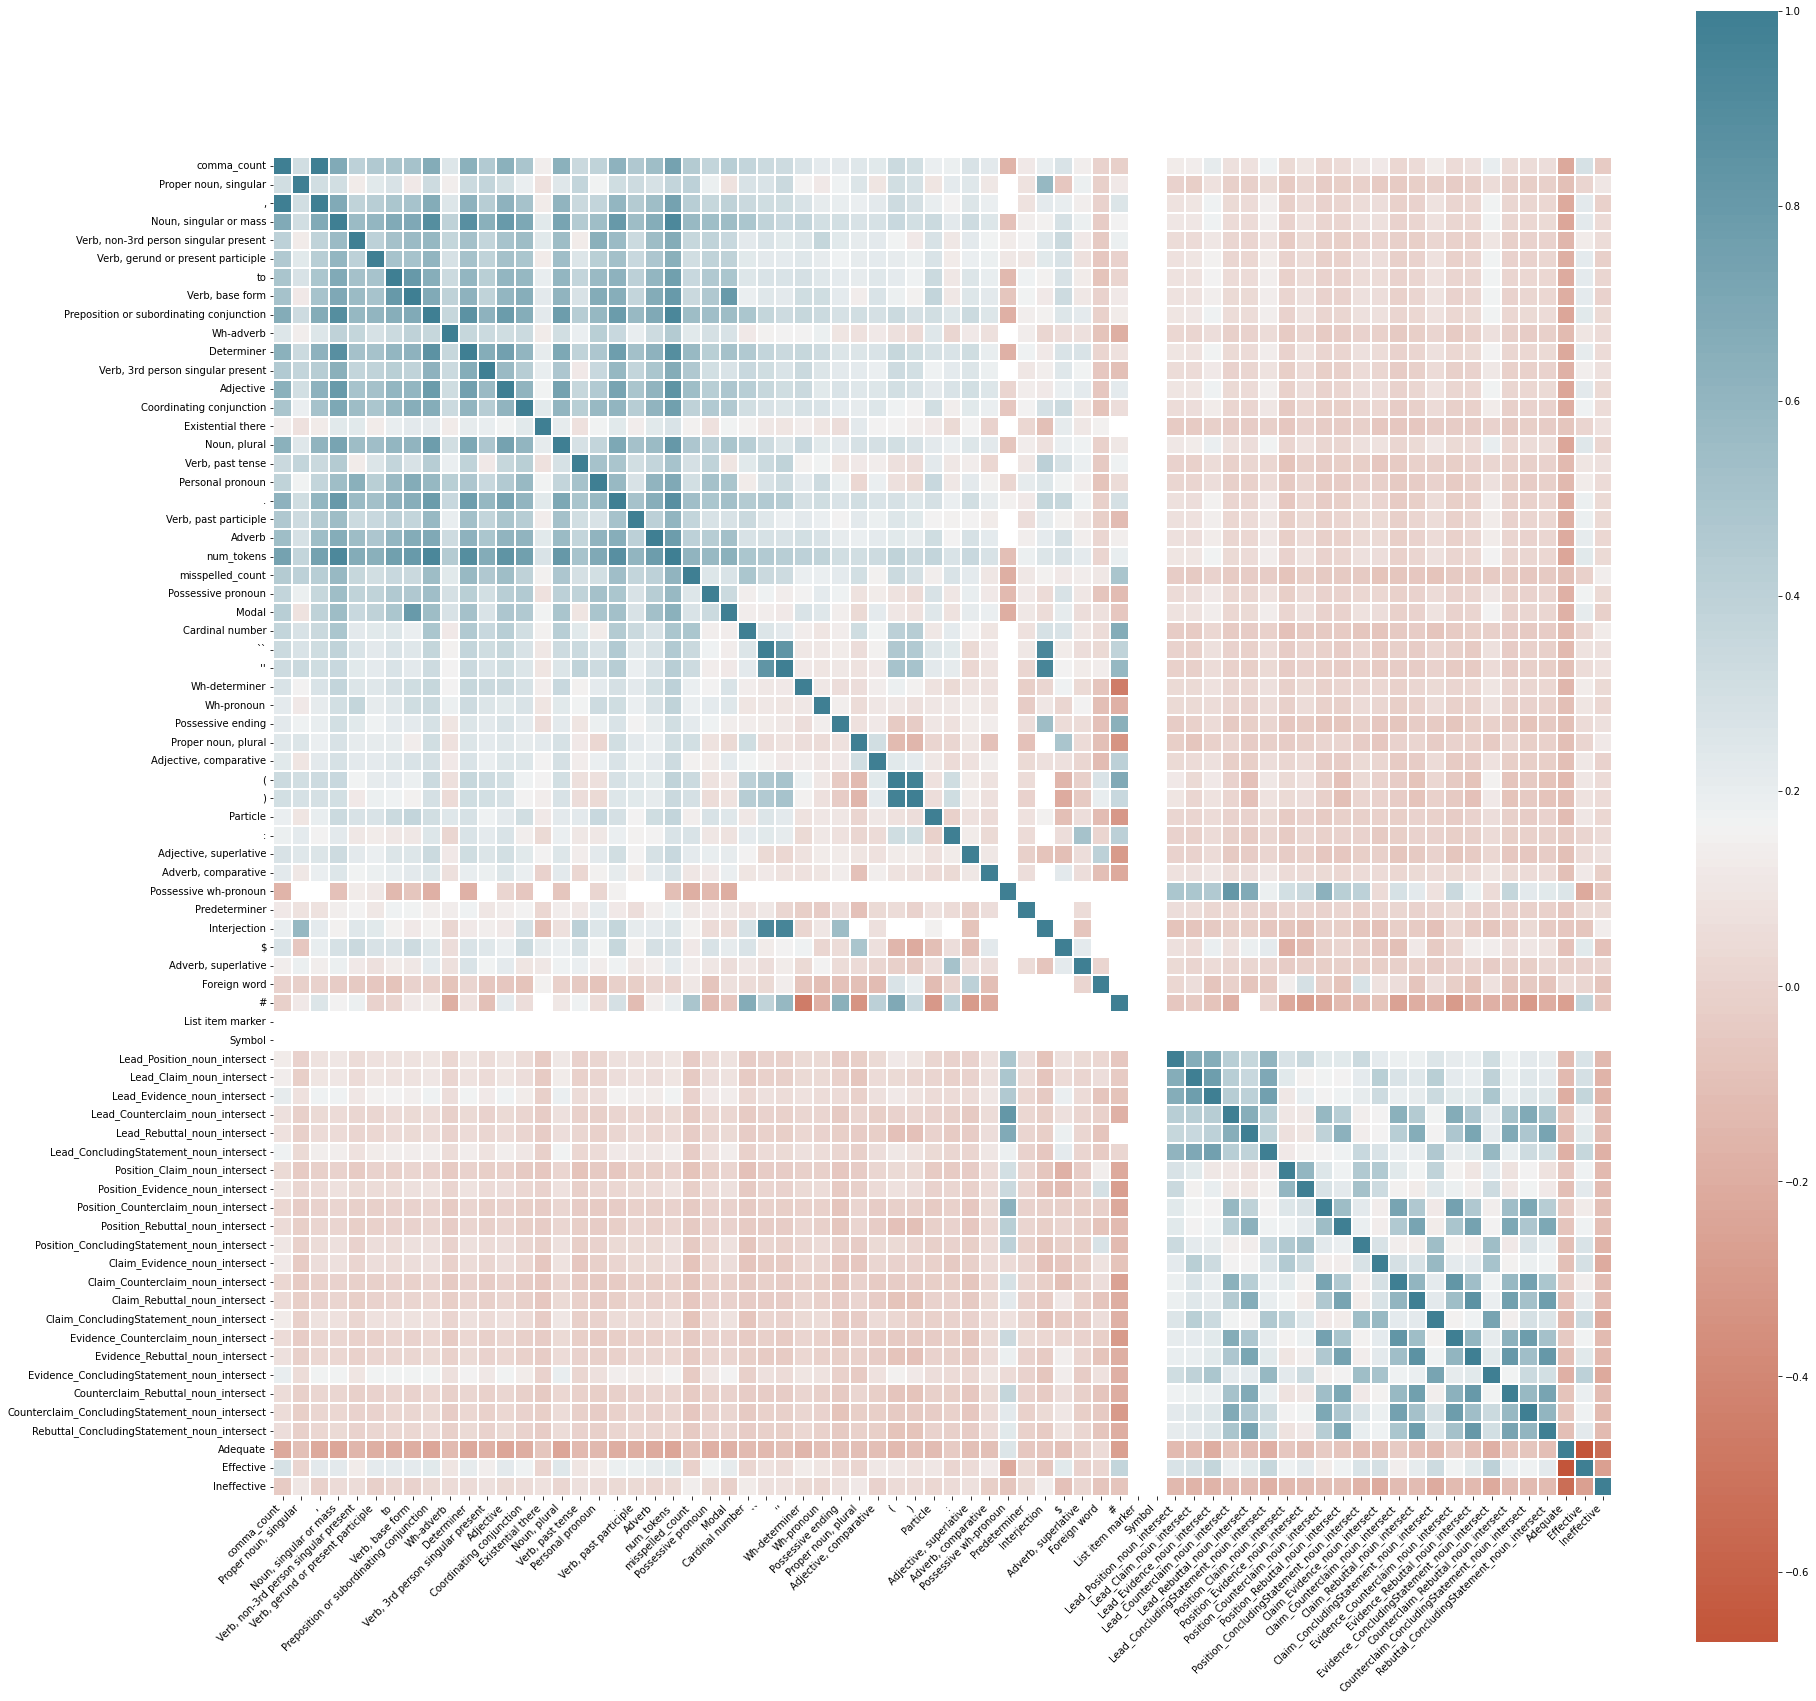

In [171]:
corr_plot(df5)

In [172]:
df5.loc[(df5['Ineffective'] >0) | (df5['Adequate'] >0)].shape

(27439, 79)

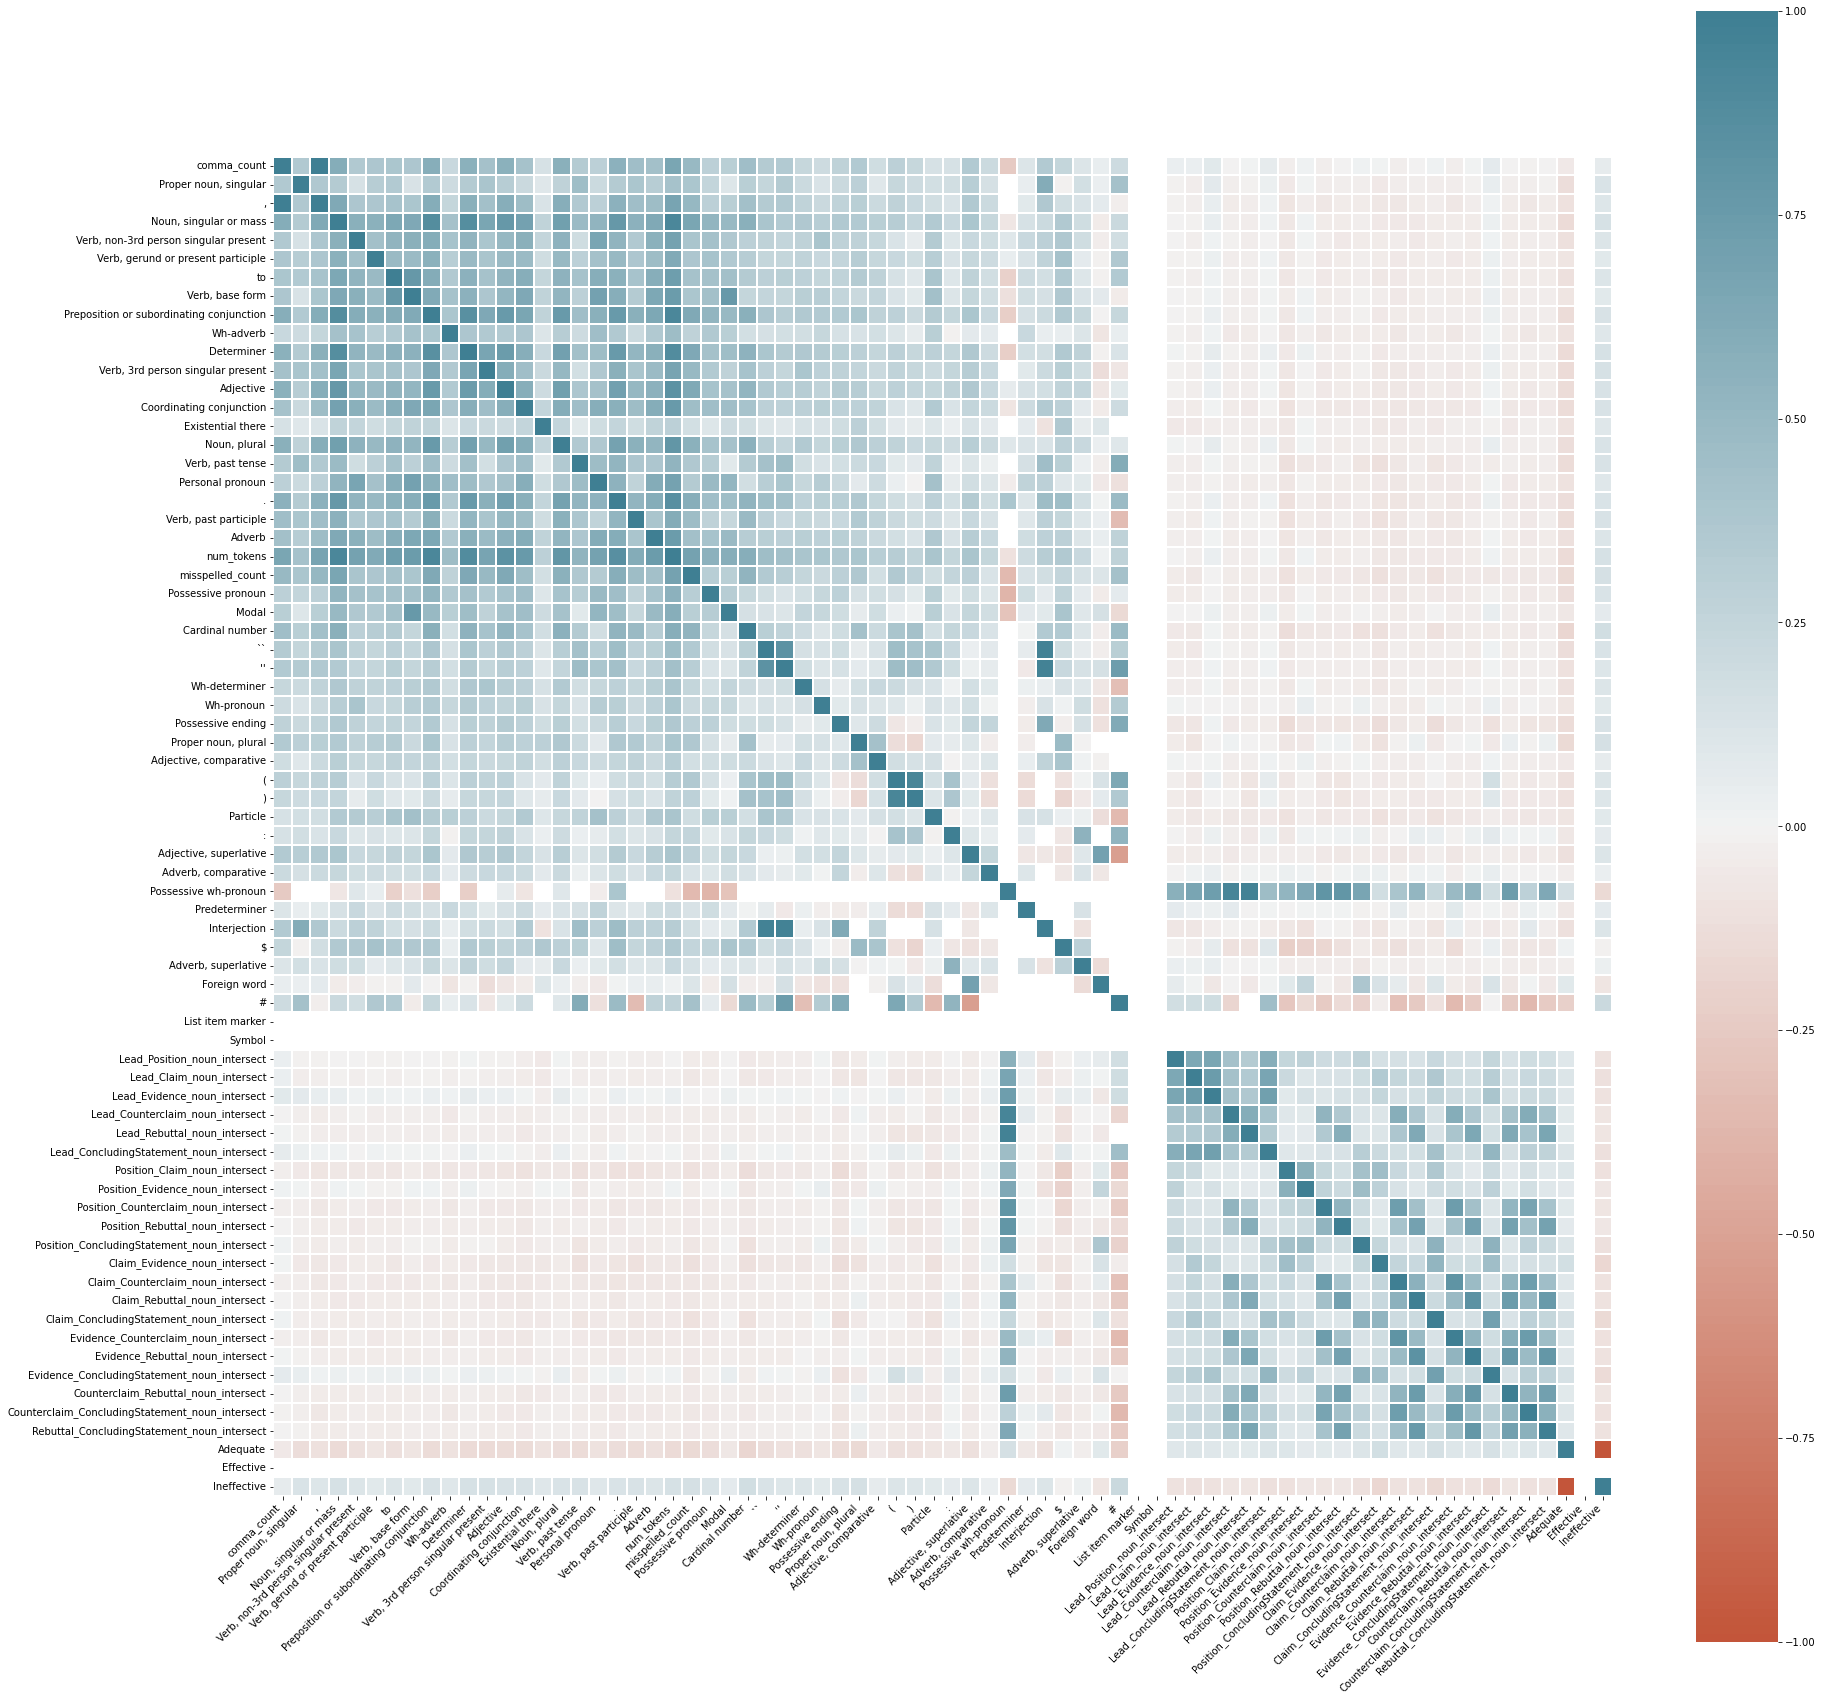

In [173]:

corr_plot(df5.loc[(df5['Ineffective'] >0) | (df5['Adequate'] >0)])

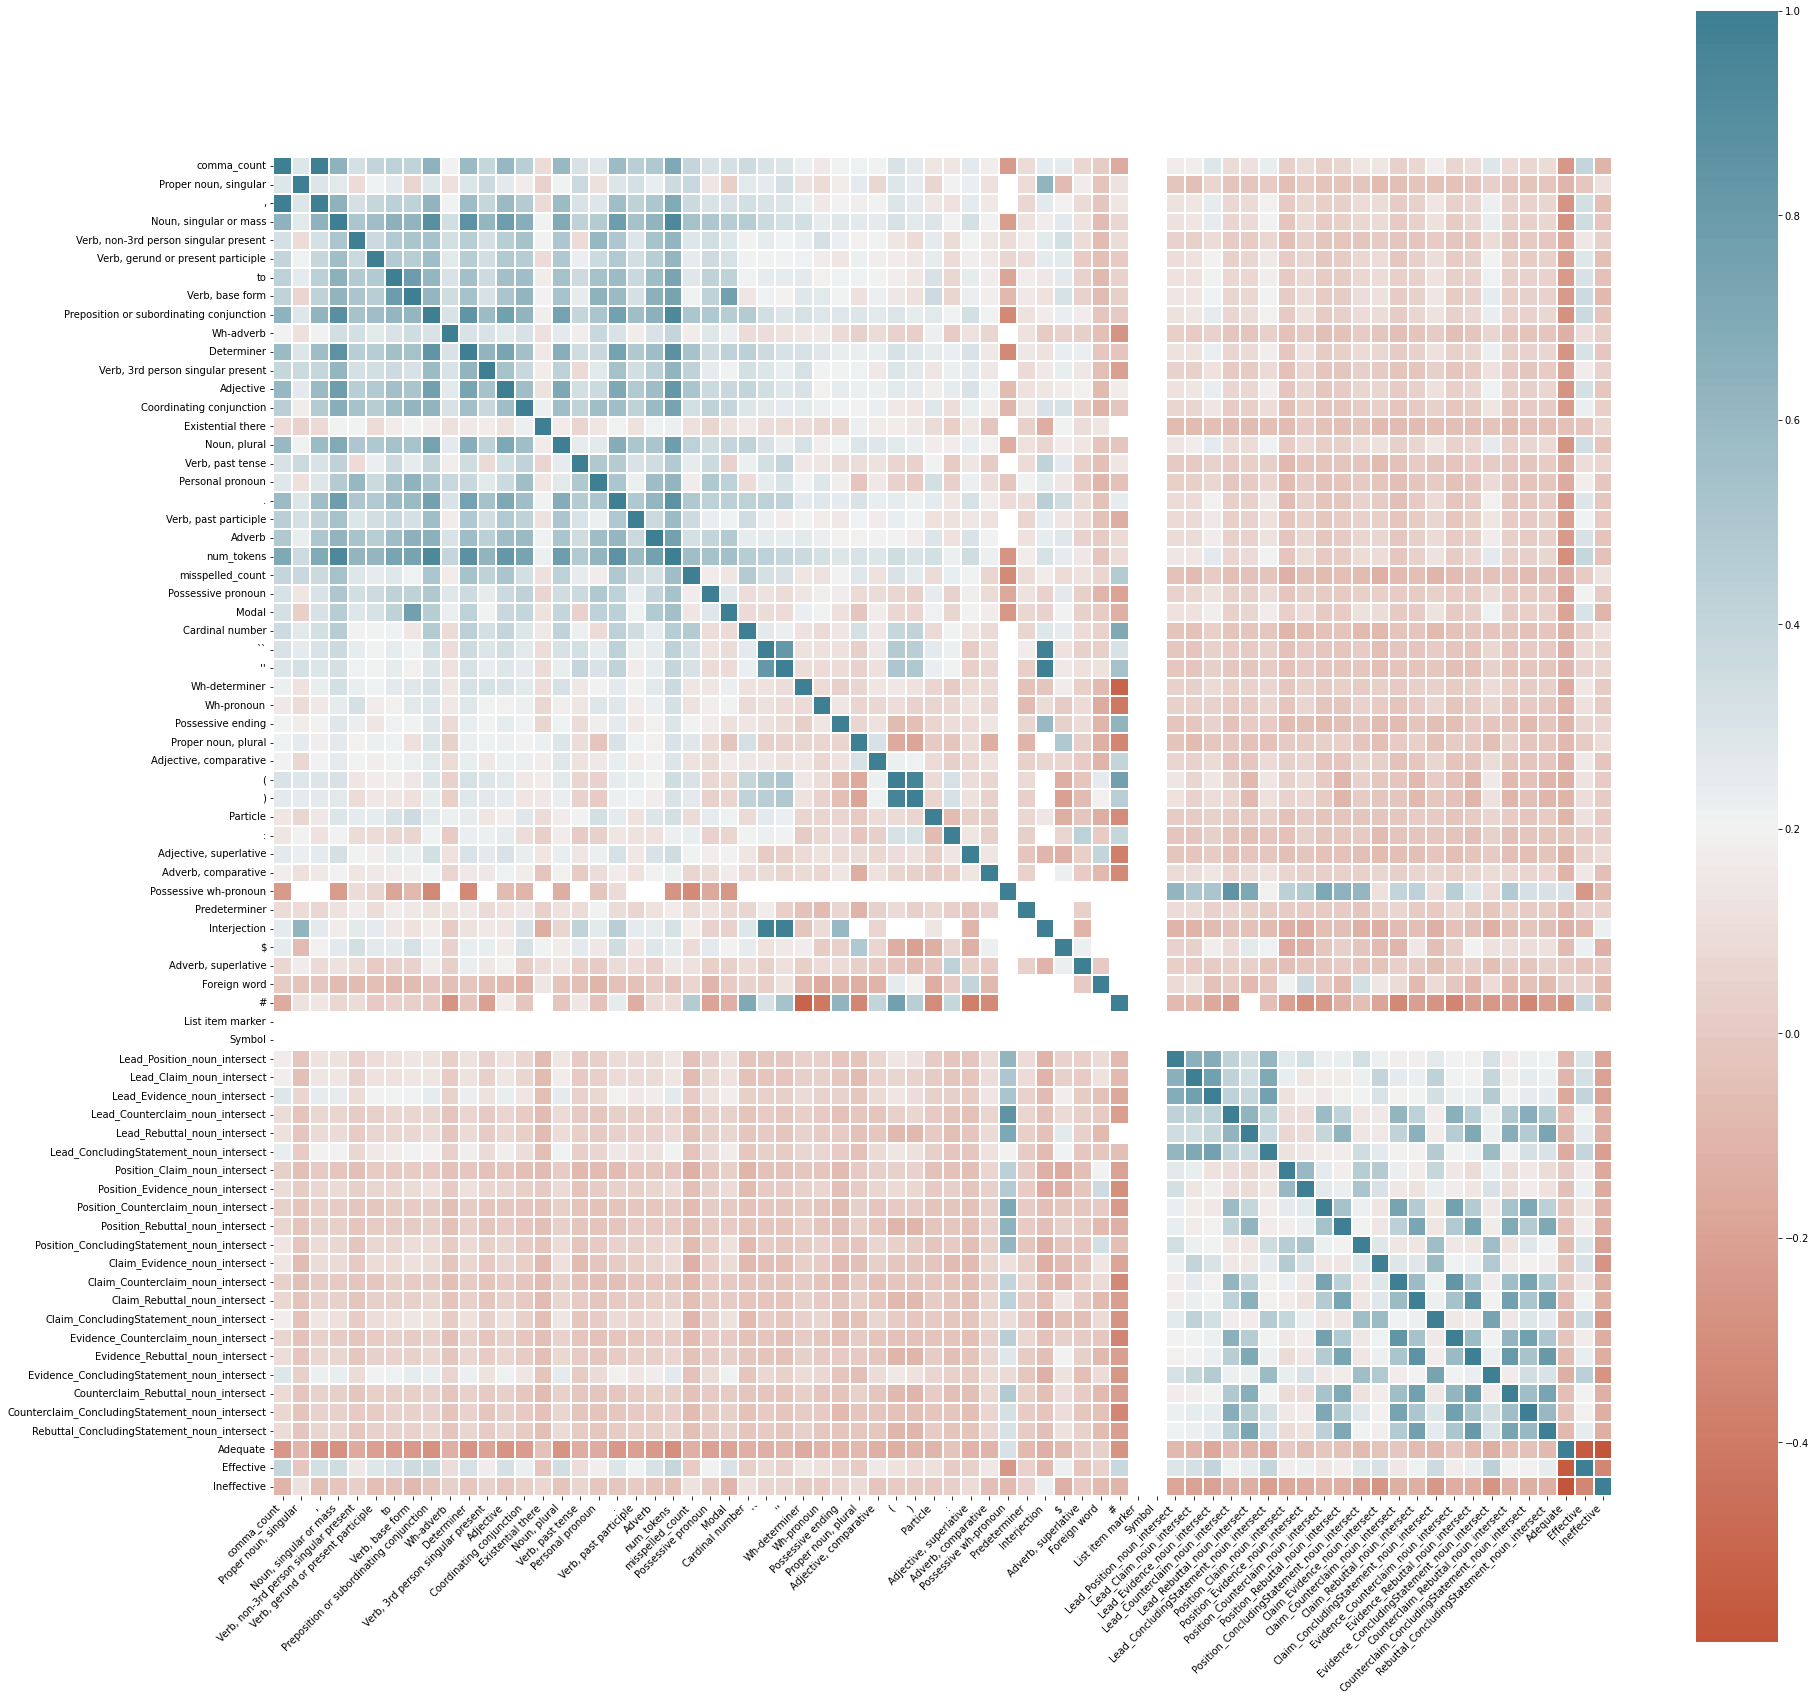

In [174]:
corr_plot(df5.loc[(df5['discourse_type'] == 'Evidence')])

In [175]:
df6 = df5
df6 = df6.rename(columns=part_of_speech_dict)
percent_missing = df6.isna().sum() * 100 / len(df5)
missing_value_df6 = pd.DataFrame({'column_name': df6.columns,
                                 'percent_missing': percent_missing})
missing_value_df6.sort_values('percent_missing', inplace=True)
print(missing_value_df6)



                                                   column_name  \
discourse_id                                      discourse_id   
spell_corrected_discourse_text  spell_corrected_discourse_text   
Effective                                            Effective   
Lead_Position_noun_intersect      Lead_Position_noun_intersect   
Lead_Claim_noun_intersect            Lead_Claim_noun_intersect   
...                                                        ...   
$                                                            $   
Possessive wh-pronoun                    Possessive wh-pronoun   
#                                                            #   
List item marker                              List item marker   
Symbol                                                  Symbol   

                                percent_missing  
discourse_id                           0.000000  
spell_corrected_discourse_text         0.000000  
Effective                              0.000000  
Lead_Po

In [176]:
#only those represented in at least 1000 of our training samples
df10 = df5['Proper_Nouns'] = df5['NNP'] + df5['NNPS']
#df10 = df5['Quote_Marks'] = df5['"'] 
df9 = df5.corr(min_periods=1000)['Ineffective']
df9 = df9.abs()
df9.sort_values(ascending=False)


Ineffective                                    1.000000
Adequate                                       0.532291
Effective                                      0.269218
Proper_Nouns                                   0.216405
Evidence_ConcludingStatement_noun_intersect    0.215428
                                                 ...   
$                                                   NaN
FW                                                  NaN
#                                                   NaN
LS                                                  NaN
SYM                                                 NaN
Name: Ineffective, Length: 73, dtype: float64

In [177]:
#corr_plot(df5.loc[(df5['Ineffective'] >0) | (df5['Adequate'] >0)])
df7 = df5 #.rename(columns=part_of_speech_dict)
count = len(df7) - df7.isna().sum()
percent_missing = df7.isna().sum() * 100 / len(df7)
missing_value_df7 = pd.DataFrame({'column_name': df7.columns,
                                 'percent_missing': percent_missing,
                                 'count' : count})
missing_value_df7.sort_values('percent_missing', inplace=True)
print(missing_value_df7)

#df7.drop(col) for col in missing_value_df7
corr(df5)

                                                                             column_name  \
discourse_id                                                                discourse_id   
Lead_Claim_noun_intersect                                      Lead_Claim_noun_intersect   
spell_corrected_discourse_text                            spell_corrected_discourse_text   
Adequate                                                                        Adequate   
Rebuttal_ConcludingStatement_noun_intersect  Rebuttal_ConcludingStatement_noun_intersect   
...                                                                                  ...   
$                                                                                      $   
WP$                                                                                  WP$   
#                                                                                      #   
LS                                                                              

NameError: name 'corr' is not defined

In [ ]:
#Sample to check the concat is correct.
#contacts[(contacts['Phone'] == '234-567-8900')]['name'].iloc[x]
"""
string = df3[(df3['discourse_id'] == '77583eb5ce9a')]['discourse_text'].iloc[0]
print(string)
print(getProportionalDict(string))
#print(df3[(df3['discourse_id'] == '77583eb5ce9a')])
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df3[(df3['discourse_id'] == '77583eb5ce9a')])


with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df3)    
"""

The state senator should consider changing election to popular vote for the president of the united states 
{'DT': 3.0, 'NN': 5.0, 'MD': 1.0, 'VB': 1.0, 'VBG': 1.0, 'TO': 1.0, 'JJ': 2.0, 'IN': 2.0, 'NNS': 1.0}


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,comma_count,NNP,",",NN,VBP,VBG,TO,VB,IN,WRB,DT,VBZ,JJ,CC,EX,NNS,VBD,PRP,.,VBN,RB,PRP$,MD,CD,``,'',WDT,WP,POS,NNPS,JJR,(,),RP,:,JJS,RBR,WP$,PDT,UH,$,RBS,FW,#,LS,SYM,type_effective_key,ClaimAdequate,ClaimEffective,ClaimIneffective,Concluding StatementAdequate,Concluding StatementEffective,Concluding StatementIneffective,CounterclaimAdequate,CounterclaimEffective,CounterclaimIneffective,EvidenceAdequate,EvidenceEffective,EvidenceIneffective,LeadAdequate,LeadEffective,LeadIneffective,PositionAdequate,PositionEffective,PositionIneffective,RebuttalAdequate,RebuttalEffective,RebuttalIneffective
25521,77583eb5ce9a,95AF46110F14,The state senator should consider changing ele...,Position,Adequate,0,NaN,NaN,0.033058,NaN,0.0,0.0,0.0,0.011111,NaN,0.02381,NaN,0.018182,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PositionAdequate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,comma_count,NNP,",",NN,VBP,VBG,TO,VB,IN,WRB,DT,VBZ,JJ,CC,EX,NNS,VBD,PRP,.,VBN,RB,PRP$,MD,CD,``,'',WDT,WP,POS,NNPS,JJR,(,),RP,:,JJS,RBR,WP$,PDT,UH,$,RBS,FW,#,LS,SYM,type_effective_key,ClaimAdequate,ClaimEffective,ClaimIneffective,Concluding StatementAdequate,Concluding StatementEffective,Concluding StatementIneffective,CounterclaimAdequate,CounterclaimEffective,CounterclaimIneffective,EvidenceAdequate,EvidenceEffective,EvidenceIneffective,LeadAdequate,LeadEffective,LeadIneffective,PositionAdequate,PositionEffective,PositionIneffective,RebuttalAdequate,RebuttalEffective,RebuttalIneffective
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,3,0.020478,0.051282,0.090909,0.022222,0.027778,0.000000,0.015152,0.122222,0.090909,0.083333,0.114286,0.018182,0.066667,0.0,0.000000,0.041667,0.007937,0.050,0.038462,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LeadAdequate,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,2,0.000000,0.025641,0.041322,0.066667,0.000000,NaN,0.000000,0.066667,0.000000,0.059524,0.085714,0.054545,NaN,0.0,NaN,NaN,0.023810,0.000,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PositionAdequate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,cc184624ca8e,FFA381E58FC6,someone can use everything that many people sa...,Evidence,Ineffective,3,0.000000,0.051282,0.090909,0.066667,NaN,0.056604,0.166667,0.077778,0.000000,0.059524,0.057143,0.054545,0.100000,NaN,0.074074,0.000000,0.039683,0.075,0.000000,0.00,NaN,0.125,NaN,NaN,NaN,0.0,0.125,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvidenceIneffective,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
36764,c8a973681feb,FFA381E58FC6,In conclusion asking for an opinion can be ben...,Concluding Statement,Ineffective,0,NaN,NaN,0.016529,NaN,0.000000,0.000000,0.000000,0.011111,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Concluding StatementIneffective,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
